In [11]:
import os
os.chdir('c:/PyStexam')

from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf" 
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [6]:
## 1번
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
click = pd.read_csv('./data/product_click.log',sep=' ', header=None)
click.columns = ['time','pid']
mycolors = sns.color_palette('hls',10)

display(click)

,time,pid
0,201612120944,p001
1,201612120944,p003
2,201612120944,p003
3,201612120945,p008
4,201612121052,p008
...,...,...
741,201708121052,p004
742,201708121052,p004
743,201708121052,p009
744,201708121115,p005


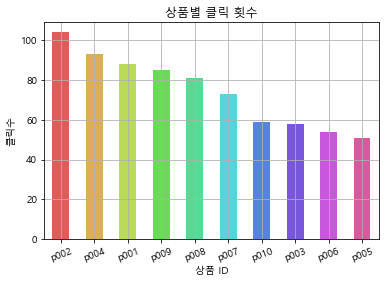

In [14]:
# 1-(1)
### countplot사용하는 방법
# sns.countplot(x='time', data=click, palette='hls',
#               order=click['pid'].value_counts().index)
# plt.grid(True)
# plt.title('상품별 클릭 횟수')

size = click.groupby('pid').size()
size.sort_values(ascending=False, inplace=True)
size

size.plot(kind='bar', grid=True, color=mycolors)
plt.title("상품별 클릭 횟수")
plt.ylabel('클릭수')
plt.xlabel('상품 ID')
plt.xticks(rotation=20)

plt.show()

In [ ]:
# 예전꺼 가져오고 싶을 때
#plog=pd.read_pickles('./data/product_log.pickle')

In [26]:
# 1-(2)
click['time'] = click['time'].astype('object') 
click['newtime'] = pd.to_datetime(click['time'],format="%Y%m%d%H%M")
click['week'] = click['newtime'].dt.weekday
#display(click)
click['week'].replace({0 : '월요일', 1 : '화요일', 2 : '수요일', 3 : '목요일', 
                       4 : '금요일', 5 : '토요일', 6 : '일요일',}, inplace=True)
#display(click)

weekcount = click.groupby('week').size()
maxweek = weekcount.idxmax()
print('클릭 수가 제일 많은 요일은 ',maxweek,'입니다.',sep='')

클릭 수가 제일 많은 요일은 목요일입니다.


In [31]:
# 1-(3)
click['hour'] = click['newtime'].dt.hour
#display(click)

hourcount = click.groupby('hour').size()
maxhour = hourcount.idxmax()
print(maxhour,'시와 ',maxhour+1,'시 사이에 제일 많이 클릭했습니다.',sep='')

9시와 10시 사이에 제일 많이 클릭했습니다.


In [70]:
## 2번
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
emp = pd.read_csv('./data/emp.csv')
emp

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20
1,7499,ALLEN,SALESMAN,7698.0,1981-02-20,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,1981-02-03,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,1981-03-02,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-10-22,1250,1400.0,30
5,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850,NaN,30
6,7782,CLARK,MANAGER,7839.0,1981-09-06,2450,NaN,10
7,7788,SCOTT,ANALYST,7566.0,1982-12-08,3000,NaN,20
8,7839,KING,PRESIDENT,NaN,1981-11-17,5000,NaN,10
9,7844,TURNER,SALESMAN,7698.0,1984-10-08,1500,NaN,30


In [71]:
# 2-(1)
grouped = emp.groupby(['deptno'])
# sumsal = grouped.sal.sum()
# display(pd.DateFrame(sumsal))
grouped.agg({'sal' : 'sum'})

,sal
deptno,
10,8750
20,10875
30,9400


In [64]:
# 2-(2)
grouped = emp.groupby(['job'])
grouped.agg({'sal' : 'sum'})

,sal
job,
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600


In [72]:
# 2-(3)
grouped = emp.groupby(['deptno','job'])
grouped.agg({'sal': 'max', 'hiredate' : 'min'})

sal    hiredate
deptno job                        
10     CLERK      1300  1982-01-25
       MANAGER    2450  1981-09-06
       PRESIDENT  5000  1981-11-17
20     ANALYST    3000  1981-12-13
       CLERK      1100  1980-12-17
       MANAGER    2975  1981-03-02
30     CLERK       950  1981-12-03
       MANAGER    2850  1981-05-01
       SALESMAN   1600  1981-02-03

In [63]:
# 2-(4)
grouped = emp.groupby(['job','deptno'])
grouped.agg({'sal' : 'max'})

sal
job       deptno      
ANALYST   20      3000
CLERK     10      1300
          20      1100
          30       950
MANAGER   10      2450
          20      2975
          30      2850
PRESIDENT 10      5000
SALESMAN  30      1600